# Water System Optimization Experiments Using Genetic Algorithms

This notebook demonstrates the optimization of a water system using genetic algorithms. We'll optimize reservoir release parameters and hydroworks distribution parameters to minimize supply deficits while considering operational constraints.

We will change different parameters of the GA (Genetic Algorithm) like population size, number of generations, crossover probability and mutation probability in order to find the best suited GA parameter set for the Zarafshan River Basin Model.

## Setup

First, let's import the required libraries and set up our parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from water_system import  WaterSystem, SupplyNode, StorageNode, DemandNode, SinkNode, HydroWorks, Edge, WaterSystemVisualizer, MultiGeneticOptimizer
import os
import sys

# Add the project directory to the system path
project_dir = 'C:/Users/giann/water_system_simulation_optimization'
if project_dir not in sys.path:
    sys.path.append(project_dir)

# Import the run sample tests function
from ZRB_system import run_ipynb_optimization
# Import the create seasonal ZRB system function
from ZRB_system import create_seasonal_ZRB_system

## Optimize ZRB system

The goal is to optimize annual reservoir and hydrowork parameter for the ZRB system. The following code block shows how the GA is called.

gen	nevals	min        	avg        	std        
0  	5     	9.63418e+11	1.65222e+12	4.58343e+11
1  	1     	9.63418e+11	1.1963e+12 	2.3343e+11 
2  	4     	9.63418e+11	1.19297e+12	3.47193e+11
3  	3     	6.43343e+11	9.94428e+11	2.54317e+11
4  	2     	5.16533e+11	7.46011e+11	1.83452e+11
5  	4     	5.16533e+11	6.15598e+11	1.75401e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 5
Generations: 5
Corss-over probability: 0.5
Mutation probability: 0.2
Final objective value: 516,533,242,856 m³


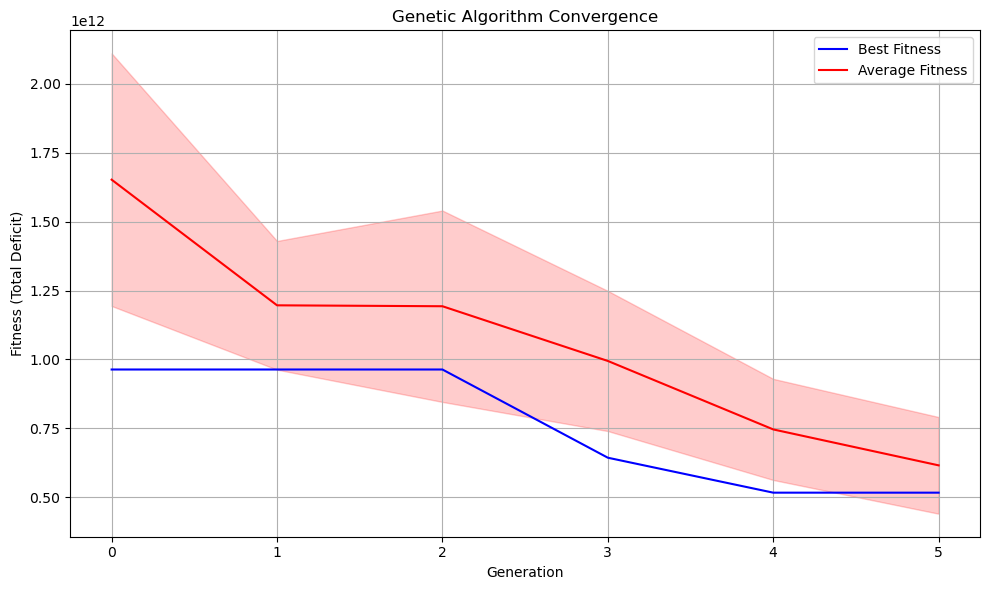

In [2]:
start_year = 2017
start_month = 1
num_time_steps = 12*3
ngen = 5
pop_size = 5
cxpb = 0.5
mutpb = 0.2

optimizer = MultiGeneticOptimizer(
        create_seasonal_ZRB_system,
        start_year=start_year,
        start_month=start_month,
        num_time_steps=num_time_steps,
        ngen=ngen,
        population_size=pop_size,
        cxpb=cxpb,
        mutpb=mutpb
    )

results = optimizer.optimize()

print("\nOptimization Results:")
print("-" * 50)
print(f"Message: {results['message']}")
print(f"Population size: {results['population_size']}")
print(f"Generations: {results['generations']}")
print(f"Corss-over probability: {results['crossover_probability']}")
print(f"Mutation probability: {results['mutation_probability']}")
print(f"Final objective value: {results['objective_value']:,.0f} m³")

optimizer.plot_convergence()

## Experiment: Population Size and Objective Function

We investigate on how population size influences the optimization outcomes, when all other parameters are fixed. 

The ZRB system consists of two reservoirs (Kattakurgan and Akdarya), where the reservoir release is defined by 5 parameters for each reservoir (h1,h2,w,m1 and m2).
This results in 10 reservoir decision variables for the optimization.

In the ZRB system there are 22 outflow edges from 8 hydroworks. Therefore, 22 hydrowork decision variables are necessary for annual optimization. 

This results in a total of 32 parameters for the ZRB system annual optimization(Seasonal optimization: 128, monthly optimization: 384). A good rule of thumb is to start with a population size roughly 2-4 times the number of variables/dimensions in your problem.

In [3]:
start_year = 2017
start_month = 1
num_time_steps = 12*3
ngen = 50
cxpb = 0.5
mutpb = 0.2

populatio_sizes= [20, 50, 100, 200, 500, 1000, 2000, 5000]

results= []

for pop_size in populatio_sizes:
    print(f'Running optimization with population size: {pop_size}')
    optimization_results = run_ipynb_optimization(start_year, start_month, num_time_steps, ngen, pop_size, cxpb, mutpb)
    results.append((pop_size, optimization_results['objective_value']))

# export results to csv
results_df = pd.DataFrame(results, columns=['Population Size', 'Final Objective Value'])
results_df.to_csv('./GA_experiments/experiment_population_size.csv', index=False)

Running optimization with population size: 20


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg       	std        
0  	20    	5.84642e+11	1.4301e+12	5.08472e+11
1  	14    	3.58012e+11	9.51923e+11	3.14945e+11
2  	13    	3.58012e+11	6.23124e+11	1.56614e+11
3  	10    	3.58012e+11	5.03729e+11	1.54892e+11
4  	12    	3.58012e+11	3.78977e+11	6.67498e+10
5  	13    	3.58012e+11	4.57595e+11	2.78085e+11
6  	11    	3.57604e+11	3.76287e+11	7.40965e+10
7  	12    	3.45777e+11	3.58567e+11	6.35404e+09
8  	11    	3.4257e+11 	4.61757e+11	1.7287e+11 
9  	10    	3.4257e+11 	3.75885e+11	7.99967e+10
10 	15    	3.4257e+11 	3.68597e+11	8.58423e+10
11 	14    	3.4257e+11 	4.41321e+11	3.73466e+11
12 	15    	3.26273e+11	4.21386e+11	1.81751e+11
13 	12    	3.18671e+11	3.58435e+11	5.94921e+10
14 	12    	3.21711e+11	3.81662e+11	1.54461e+11
15 	10    	3.09955e+11	4.41292e+11	3.45838e+11
16 	6     	3.09955e+11	3.22521e+11	7.99815e+09
17 	11    	3.09955e+11	3.45226e+11	8.30321e+10
18 	12    	3.09955e+11	3.33559e+11	5.32509e+10
19 	8     	3.09955e+11	3.32543e+11	8.65568e+10
20 	11    	3.09

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std       
0  	50    	6.07349e+11	1.59061e+12	5.2939e+11
1  	34    	4.15523e+11	1.07696e+12	3.75968e+11
2  	29    	4.01654e+11	7.20838e+11	2.75161e+11
3  	39    	3.82444e+11	5.69285e+11	2.10415e+11
4  	31    	3.3592e+11 	4.57944e+11	1.15037e+11
5  	30    	3.3592e+11 	4.51718e+11	1.8405e+11 
6  	29    	3.3592e+11 	4.18592e+11	1.14153e+11
7  	27    	3.3592e+11 	4.23321e+11	2.33627e+11
8  	30    	3.3592e+11 	4.21323e+11	2.10321e+11
9  	30    	3.03478e+11	4.20746e+11	2.66043e+11
10 	31    	3.03478e+11	4.11417e+11	2.1331e+11 
11 	31    	2.7763e+11 	3.85899e+11	1.74974e+11
12 	40    	2.7763e+11 	3.99558e+11	2.44232e+11
13 	36    	2.7763e+11 	3.37274e+11	1.1006e+11 
14 	25    	2.7763e+11 	3.46183e+11	1.68184e+11
15 	25    	2.7763e+11 	3.3892e+11 	2.79191e+11
16 	33    	2.7763e+11 	3.60249e+11	2.22766e+11
17 	28    	2.7763e+11 	3.42867e+11	1.88496e+11
18 	32    	2.7763e+11 	3.75895e+11	2.1626e+11 
19 	29    	2.7763e+11 	3.38378e+11	1.68e+11   
20 	30    	2.77

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	100   	4.48162e+11	1.59757e+12	5.58525e+11
1  	51    	4.45867e+11	1.02259e+12	3.34309e+11
2  	65    	4.13435e+11	7.40617e+11	2.52934e+11
3  	69    	3.71913e+11	5.95273e+11	2.50711e+11
4  	61    	3.05674e+11	4.90253e+11	1.36375e+11
5  	64    	3.05674e+11	4.64948e+11	1.88815e+11
6  	65    	2.96229e+11	4.4777e+11 	2.07257e+11
7  	53    	2.86994e+11	4.12413e+11	1.89188e+11
8  	65    	2.16637e+11	3.96325e+11	2.35465e+11
9  	68    	2.11475e+11	3.3172e+11 	1.32182e+11
10 	66    	2.07946e+11	3.27768e+11	1.95162e+11
11 	58    	1.92786e+11	2.95673e+11	1.40938e+11
12 	66    	1.92147e+11	2.99111e+11	2.15613e+11
13 	67    	1.87958e+11	2.89364e+11	2.96905e+11
14 	63    	1.76555e+11	2.77481e+11	1.86376e+11
15 	44    	1.76555e+11	2.50864e+11	1.63862e+11
16 	69    	1.76555e+11	3.05723e+11	2.61526e+11
17 	59    	1.70925e+11	2.7263e+11 	2.47019e+11
18 	64    	1.70925e+11	2.21481e+11	1.31366e+11
19 	58    	1.70925e+11	2.81431e+11	2.55806e+11
20 	69    	1.

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	200   	4.46201e+11	1.54654e+12	5.05032e+11
1  	109   	3.49751e+11	9.89773e+11	3.21469e+11
2  	102   	3.49751e+11	7.15978e+11	2.58816e+11
3  	113   	2.98118e+11	5.1566e+11 	1.89699e+11
4  	134   	2.70243e+11	4.38956e+11	1.98824e+11
5  	133   	2.50128e+11	3.80412e+11	1.53657e+11
6  	118   	2.2085e+11 	3.62824e+11	1.79143e+11
7  	124   	2.20799e+11	3.25987e+11	1.69315e+11
8  	98    	2.18887e+11	3.04854e+11	2.04617e+11
9  	123   	2.15266e+11	3.04782e+11	1.82927e+11
10 	135   	2.02334e+11	2.76444e+11	1.18179e+11
11 	124   	2.02334e+11	2.81072e+11	1.64267e+11
12 	128   	1.95358e+11	2.80736e+11	1.92797e+11
13 	122   	1.93985e+11	2.82538e+11	2.09768e+11
14 	110   	1.93985e+11	2.57819e+11	1.71233e+11
15 	137   	1.9285e+11 	2.5675e+11 	1.78972e+11
16 	116   	1.92457e+11	2.50494e+11	1.5813e+11 
17 	115   	1.91823e+11	2.55924e+11	1.78688e+11
18 	117   	1.88778e+11	2.49502e+11	1.59122e+11
19 	101   	1.838e+11  	2.65603e+11	2.23205e+11
20 	123   	1.

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	500   	4.62447e+11	1.54911e+12	5.37756e+11
1  	283   	3.95428e+11	9.95918e+11	3.33692e+11
2  	325   	3.41103e+11	7.32594e+11	2.56088e+11
3  	298   	2.75762e+11	5.68077e+11	1.86108e+11
4  	278   	2.75762e+11	4.86531e+11	1.94714e+11
5  	311   	2.75762e+11	4.35665e+11	1.74214e+11
6  	281   	2.32569e+11	4.09874e+11	1.90603e+11
7  	291   	2.30637e+11	4.03165e+11	2.47541e+11
8  	314   	2.24028e+11	3.74663e+11	2.25831e+11
9  	282   	1.73634e+11	3.34488e+11	1.7562e+11 
10 	296   	1.73634e+11	3.18695e+11	1.75935e+11
11 	291   	1.40333e+11	3.06306e+11	2.04083e+11
12 	301   	1.40333e+11	2.8305e+11 	2.17061e+11
13 	287   	1.40333e+11	2.82785e+11	2.45916e+11
14 	306   	1.35771e+11	2.76653e+11	2.22488e+11
15 	289   	1.31146e+11	2.56249e+11	2.19548e+11
16 	301   	1.2405e+11 	2.60881e+11	2.59072e+11
17 	298   	1.21155e+11	2.32308e+11	2.4216e+11 
18 	310   	1.18977e+11	2.34452e+11	2.65655e+11
19 	295   	1.18977e+11	2.13294e+11	2.37317e+11
20 	312   	1.

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	1000  	4.23232e+11	1.54393e+12	5.25927e+11
1  	574   	3.52809e+11	9.60938e+11	3.27494e+11
2  	607   	2.99815e+11	6.74258e+11	2.38687e+11
3  	591   	2.99815e+11	5.33934e+11	1.92844e+11
4  	615   	2.5725e+11 	4.50709e+11	1.60558e+11
5  	587   	2.4764e+11 	4.23148e+11	1.99045e+11
6  	600   	2.4764e+11 	3.80475e+11	1.39958e+11
7  	627   	2.35248e+11	3.71096e+11	1.7535e+11 
8  	583   	2.15753e+11	3.56056e+11	1.89169e+11
9  	593   	2.13822e+11	3.2682e+11 	1.59217e+11
10 	555   	2.0088e+11 	3.26892e+11	2.05995e+11
11 	577   	1.89662e+11	3.26711e+11	2.33406e+11
12 	599   	1.80752e+11	3.08537e+11	1.93196e+11
13 	583   	1.75052e+11	2.9491e+11 	2.08877e+11
14 	613   	1.69867e+11	2.82043e+11	1.7973e+11 
15 	590   	1.71225e+11	2.73053e+11	2.03314e+11
16 	571   	1.59126e+11	2.59905e+11	1.94519e+11
17 	590   	1.59126e+11	2.6561e+11 	2.33224e+11
18 	586   	1.51769e+11	2.57293e+11	2.16782e+11
19 	606   	1.51186e+11	2.46495e+11	2.13381e+11
20 	601   	1.

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min       	avg       	std        
0  	2000  	3.5851e+11	1.5415e+12	5.35453e+11
1  	1168  	2.6085e+11	9.84093e+11	3.33169e+11
2  	1201  	2.56671e+11	7.03306e+11	2.52189e+11
3  	1193  	2.4094e+11 	5.33312e+11	1.88608e+11
4  	1227  	2.4094e+11 	4.64464e+11	1.79722e+11
5  	1243  	2.18272e+11	4.16462e+11	1.56842e+11
6  	1212  	2.18272e+11	3.96581e+11	1.77708e+11
7  	1227  	1.97666e+11	3.63906e+11	1.80509e+11
8  	1238  	1.77858e+11	3.3401e+11 	1.7969e+11 
9  	1180  	1.77858e+11	3.18494e+11	1.9924e+11 
10 	1206  	1.56148e+11	2.99766e+11	1.71518e+11
11 	1222  	1.56148e+11	3.02238e+11	2.10538e+11
12 	1169  	1.54114e+11	2.94041e+11	2.05352e+11
13 	1240  	1.43468e+11	2.90508e+11	2.20742e+11
14 	1208  	1.43299e+11	2.75085e+11	1.98653e+11
15 	1225  	1.42737e+11	2.75731e+11	2.22298e+11
16 	1205  	1.30248e+11	2.64047e+11	2.1609e+11 
17 	1190  	1.21168e+11	2.64911e+11	2.31262e+11
18 	1173  	1.17588e+11	2.56124e+11	2.22913e+11
19 	1213  	1.11605e+11	2.56807e+11	2.46433e+11
20 	1186  	1.06746

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	5000  	3.23603e+11	1.53947e+12	5.41058e+11
1  	2980  	3.23603e+11	9.69154e+11	3.30727e+11
2  	2997  	2.72309e+11	6.93467e+11	2.57031e+11
3  	2923  	2.46254e+11	5.30422e+11	2.13703e+11
4  	3024  	2.46254e+11	4.55013e+11	1.93357e+11
5  	3035  	2.32854e+11	4.15464e+11	1.83384e+11
6  	2979  	1.85893e+11	3.88216e+11	1.81954e+11
7  	2971  	1.85893e+11	3.63858e+11	1.82854e+11
8  	2939  	1.85893e+11	3.4167e+11 	1.85795e+11
9  	2973  	1.82597e+11	3.26347e+11	2.00528e+11
10 	3024  	1.73335e+11	3.10491e+11	1.92107e+11
11 	3007  	1.54018e+11	3.02875e+11	2.02126e+11
12 	2988  	1.46909e+11	2.93123e+11	2.12364e+11
13 	3020  	1.46909e+11	2.85478e+11	2.18414e+11
14 	3079  	1.28435e+11	2.73024e+11	2.15617e+11
15 	3034  	1.21552e+11	2.61994e+11	2.19432e+11
16 	2936  	1.10553e+11	2.52999e+11	2.2338e+11 
17 	2980  	1.10553e+11	2.47446e+11	2.27826e+11
18 	2968  	1.07454e+11	2.41881e+11	2.31206e+11
19 	2995  	1.03064e+11	2.39719e+11	2.37593e+11
20 	3015  	1.

## Analyze Population Size Results

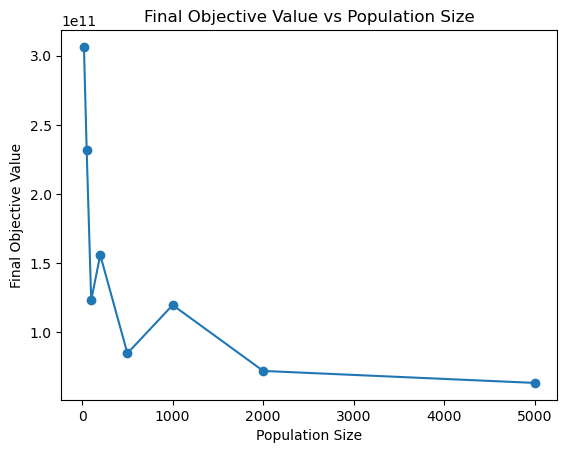

In [4]:
experiment_results = pd.read_csv('./GA_experiments/experiment_population_size.csv')

# plot figure of experiment results plotting Population size versus Final Objective Value.
fig, ax = plt.subplots()
ax.plot(experiment_results['Population Size'], experiment_results['Final Objective Value'], 'o-')
ax.set_xlabel('Population Size')
ax.set_ylabel('Final Objective Value')
ax.set_title('Final Objective Value vs Population Size')
plt.show()

# save figure on disc
fig.savefig('./GA_experiments/experiment_results_pop_size_versus_obj_value.png')